# Data labelling (part 1, version 1)

As first iteraction we decided to label the data according to the changes in turnover as following:
- growing companies (turnover change should be at positive and mean at least 5% a year)
- stable companies (turnover change is between 0 to 5%)
- failing companies (turnover change is negative)

In [1]:
# Import libraries

import numpy as np
import pandas as pd

In [2]:
# Load data

df = pd.read_csv('./data/dataframes/full_period_unlabeled.csv')
df.head()

,Unnamed: 0,Registration_number,Business_area_by_EMTAK_system,All_taxes,Labor_taxes,Turnover,number_of_employees,year_quarter,EMTAK_by_number,Client_ID_by_Eesti_Pank,Registration_date,Deletion_Date,cum_sum_turnover,cum_perc_turnover,combined_taxes,cum_sum_combined_taxes,revenue_growth,profit_per_employee,emp_growth_rate_CGR,ACE
0,0,10000024,1,12126.74,11533.92,51486.75,9.0,2017_1,5811.0,8.0,1990-07-17,1,51486.75,2.74,23660.66,23660.66,0.00,5720.75,0.015141,3.0
1,1,10000024,1,8484.90,7931.42,59869.39,8.0,2017_2,5811.0,8.0,1990-07-17,1,111356.14,5.92,16416.32,40076.98,0.16,7483.67,0.015141,3.0
2,2,10000024,1,10468.75,10068.65,55895.57,8.0,2017_3,5811.0,8.0,1990-07-17,1,167251.71,8.89,20537.40,60614.38,-0.07,6986.95,0.015141,3.0
3,3,10000024,1,7887.05,7751.34,57334.79,9.0,2017_4,5811.0,8.0,1990-07-17,1,224586.50,11.93,15638.39,76252.77,0.03,6370.53,0.015141,3.0
4,4,10000024,1,9320.26,8757.33,59484.22,10.0,2018_1,5811.0,8.0,1990-07-17,1,284070.72,15.09,18077.59,94330.36,0.04,5948.42,0.015141,3.0


In [3]:
df.shape

(1617211, 20)

In [4]:
df = df.drop('Unnamed: 0', axis=1)
df.reset_index(drop=True)
df.head()

,Registration_number,Business_area_by_EMTAK_system,All_taxes,Labor_taxes,Turnover,number_of_employees,year_quarter,EMTAK_by_number,Client_ID_by_Eesti_Pank,Registration_date,Deletion_Date,cum_sum_turnover,cum_perc_turnover,combined_taxes,cum_sum_combined_taxes,revenue_growth,profit_per_employee,emp_growth_rate_CGR,ACE
0,10000024,1,12126.74,11533.92,51486.75,9.0,2017_1,5811.0,8.0,1990-07-17,1,51486.75,2.74,23660.66,23660.66,0.00,5720.75,0.015141,3.0
1,10000024,1,8484.90,7931.42,59869.39,8.0,2017_2,5811.0,8.0,1990-07-17,1,111356.14,5.92,16416.32,40076.98,0.16,7483.67,0.015141,3.0
2,10000024,1,10468.75,10068.65,55895.57,8.0,2017_3,5811.0,8.0,1990-07-17,1,167251.71,8.89,20537.40,60614.38,-0.07,6986.95,0.015141,3.0
3,10000024,1,7887.05,7751.34,57334.79,9.0,2017_4,5811.0,8.0,1990-07-17,1,224586.50,11.93,15638.39,76252.77,0.03,6370.53,0.015141,3.0
4,10000024,1,9320.26,8757.33,59484.22,10.0,2018_1,5811.0,8.0,1990-07-17,1,284070.72,15.09,18077.59,94330.36,0.04,5948.42,0.015141,3.0


In [5]:
df.shape

(1617211, 19)

In [6]:
# Define labelling function

def add_labels(g):
    ex_df = pd.DataFrame(g).reset_index()

    mean_growth = ex_df['revenue_growth'].mean()
    #print(list(ex_df['Registration_number'])[1] + ' ' + str(mean_growth))
    if mean_growth > 5:
        ex_df['label'] = 'growing'
    elif mean_growth < 0:
        ex_df['label'] = 'failing'
    else:
        ex_df['label'] = 'stable'
    return ex_df

In [7]:
# Label the data

df_labelled = df.groupby("Registration_number").apply(add_labels).reset_index(drop=True)

In [8]:
df_labelled = df_labelled.drop('index', axis=1)
df_labelled.reset_index(drop=True, inplace=True)
df_labelled.head()

,Registration_number,Business_area_by_EMTAK_system,All_taxes,Labor_taxes,Turnover,number_of_employees,year_quarter,EMTAK_by_number,Client_ID_by_Eesti_Pank,Registration_date,Deletion_Date,cum_sum_turnover,cum_perc_turnover,combined_taxes,cum_sum_combined_taxes,revenue_growth,profit_per_employee,emp_growth_rate_CGR,ACE,label
0,10000024,1,12126.74,11533.92,51486.75,9.0,2017_1,5811.0,8.0,1990-07-17,1,51486.75,2.74,23660.66,23660.66,0.00,5720.75,0.015141,3.0,stable
1,10000024,1,8484.90,7931.42,59869.39,8.0,2017_2,5811.0,8.0,1990-07-17,1,111356.14,5.92,16416.32,40076.98,0.16,7483.67,0.015141,3.0,stable
2,10000024,1,10468.75,10068.65,55895.57,8.0,2017_3,5811.0,8.0,1990-07-17,1,167251.71,8.89,20537.40,60614.38,-0.07,6986.95,0.015141,3.0,stable
3,10000024,1,7887.05,7751.34,57334.79,9.0,2017_4,5811.0,8.0,1990-07-17,1,224586.50,11.93,15638.39,76252.77,0.03,6370.53,0.015141,3.0,stable
4,10000024,1,9320.26,8757.33,59484.22,10.0,2018_1,5811.0,8.0,1990-07-17,1,284070.72,15.09,18077.59,94330.36,0.04,5948.42,0.015141,3.0,stable


In [9]:
# Counting how much we have in each class

df_companies = df_labelled.groupby('label').count()
df_companies = df_companies.iloc[:,0:1]
df_companies.head()

,Registration_number
label,
failing,104512
growing,508911
stable,1003788


In [26]:
# Get a list of unique companies
df_companies_list = df_labelled.drop_duplicates('Registration_number')
df_companies_list.shape

(108784, 20)

In [27]:
df_label_statistics = df_companies_list.groupby('label').count()
df_label_statistics = df_label_statistics.iloc[:,0:1]
df_label_statistics

,Registration_number
label,
failing,9118
growing,35647
stable,64019


(0.0, 65.0)

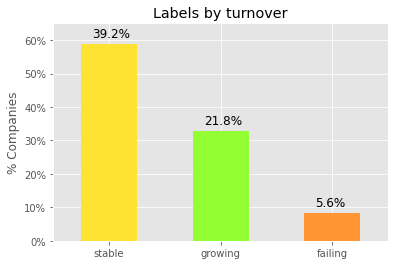

In [34]:
# Print company distribution graph
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
plt.style.use('ggplot')

colors = [ '#FFE333', '#93FF33', '#FF9633']
ax = (df_companies_list['label'].value_counts()*100.0 /len(df_companies_list)).plot(kind='bar',
                                                                stacked = True,
                                                                rot = 0,
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Companies')
#ax.set_xlabel('Label')
ax.set_ylabel('% Companies')
ax.set_title('Labels by turnover')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.1, i.get_height()+2, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='black')

# change axe margins
ax = plt.gca()
ax.set_ylim([0, 65])

In [ ]:
# Splitting by timeframe and saving data

df_labelled.to_csv('./data/dataframes/full_period_labeled_v1.csv')

In [11]:
# Filter out data that is before 1st quarter of 2020

df_before = df_labelled.copy(deep=True)

In [12]:
df_before = df_before.loc[df_before.apply(lambda x: x.year_quarter in ['2017_1', '2017_2', '2017_3', '2017_4', '2018_1', '2018_2', '2018_3', '2018_4', '2019_1', '2019_2', '2019_3', '2019_4', '2020_1'], axis=1)]

In [13]:
df_before.head()

,Registration_number,Business_area_by_EMTAK_system,All_taxes,Labor_taxes,Turnover,number_of_employees,year_quarter,EMTAK_by_number,Client_ID_by_Eesti_Pank,Registration_date,Deletion_Date,cum_sum_turnover,cum_perc_turnover,combined_taxes,cum_sum_combined_taxes,revenue_growth,profit_per_employee,emp_growth_rate_CGR,ACE,label
0,10000024,1,12126.74,11533.92,51486.75,9.0,2017_1,5811.0,8.0,1990-07-17,1,51486.75,2.74,23660.66,23660.66,0.00,5720.75,0.015141,3.0,stable
1,10000024,1,8484.90,7931.42,59869.39,8.0,2017_2,5811.0,8.0,1990-07-17,1,111356.14,5.92,16416.32,40076.98,0.16,7483.67,0.015141,3.0,stable
2,10000024,1,10468.75,10068.65,55895.57,8.0,2017_3,5811.0,8.0,1990-07-17,1,167251.71,8.89,20537.40,60614.38,-0.07,6986.95,0.015141,3.0,stable
3,10000024,1,7887.05,7751.34,57334.79,9.0,2017_4,5811.0,8.0,1990-07-17,1,224586.50,11.93,15638.39,76252.77,0.03,6370.53,0.015141,3.0,stable
4,10000024,1,9320.26,8757.33,59484.22,10.0,2018_1,5811.0,8.0,1990-07-17,1,284070.72,15.09,18077.59,94330.36,0.04,5948.42,0.015141,3.0,stable


In [14]:
df_before.shape

(1069895, 20)

In [15]:
# Save acquired data into a csv

df_before.to_csv("./data/dataframes/before_covid_labelled_v1.csv", index=False)

In [16]:
# Filter out data that is since 2nd quarter of 2020

df_during = df_labelled.copy(deep=True)

In [17]:
df_during = df_during.loc[df_during.apply(lambda x: x.year_quarter in ['2020_2', '2020_3', '2020_4', '2021_1', '2021_2', '2021_3'], axis=1)]


In [18]:
df_during.head()

,Registration_number,Business_area_by_EMTAK_system,All_taxes,Labor_taxes,Turnover,number_of_employees,year_quarter,EMTAK_by_number,Client_ID_by_Eesti_Pank,Registration_date,Deletion_Date,cum_sum_turnover,cum_perc_turnover,combined_taxes,cum_sum_combined_taxes,revenue_growth,profit_per_employee,emp_growth_rate_CGR,ACE,label
13,10000024,1,18474.78,10983.73,137159.52,9.0,2020_2,5811.0,8.0,1990-07-17,1,1179457.60,62.67,29458.51,350586.87,0.06,15239.95,0.015141,3.0,stable
14,10000024,1,18969.94,14565.42,107660.58,10.0,2020_3,5811.0,8.0,1990-07-17,1,1287118.18,68.39,33535.36,384122.23,-0.22,10766.06,0.015141,3.0,stable
15,10000024,1,20981.29,15506.56,147818.28,10.0,2020_4,5811.0,8.0,1990-07-17,1,1434936.46,76.25,36487.85,420610.08,0.37,14781.83,0.015141,3.0,stable
16,10000024,1,22353.85,18034.91,140346.67,11.0,2021_1,5811.0,8.0,1990-07-17,1,1575283.13,83.71,40388.76,460998.84,-0.05,12758.79,0.015141,3.0,stable
17,10000024,1,19685.75,18454.83,162231.81,12.0,2021_2,5811.0,8.0,1990-07-17,1,1737514.94,92.33,38140.58,499139.42,0.16,13519.32,0.015141,3.0,stable


In [19]:
df_during.shape

(547316, 20)

In [20]:
# Save acquired data into a csv

df_during.to_csv("./data/dataframes/during_covid_labelled_v1.csv", index=False)

In [21]:
# View best performers

df_review = df_labelled[df_labelled['label']=='growing']

In [22]:
df_review.Registration_number.unique()

array([10001259, 10001992, 10002394, ..., 16109101, 16113002, 16116905])

In [23]:
df_review.head()

,Registration_number,Business_area_by_EMTAK_system,All_taxes,Labor_taxes,Turnover,number_of_employees,year_quarter,EMTAK_by_number,Client_ID_by_Eesti_Pank,Registration_date,Deletion_Date,cum_sum_turnover,cum_perc_turnover,combined_taxes,cum_sum_combined_taxes,revenue_growth,profit_per_employee,emp_growth_rate_CGR,ACE,label
456,10001259,1,0.00,0.0,8.0,1.0,2017_1,5811.0,8.0,1995-10-26,1,8.0,0.35,0.00,0.00,0.00,8.0,0.0,0.0,growing
457,10001259,1,1.26,0.0,14.0,1.0,2017_2,5811.0,8.0,1995-10-26,1,22.0,0.96,1.26,1.26,0.75,14.0,0.0,0.0,growing
458,10001259,1,0.90,0.0,10.0,1.0,2017_3,5811.0,8.0,1995-10-26,1,32.0,1.39,0.90,2.16,-0.29,10.0,0.0,0.0,growing
459,10001259,1,0.72,0.0,8.0,1.0,2017_4,5811.0,8.0,1995-10-26,1,40.0,1.74,0.72,2.88,-0.20,8.0,0.0,0.0,growing
460,10001259,1,2.16,0.0,24.0,1.0,2018_1,5811.0,8.0,1995-10-26,1,64.0,2.79,2.16,5.04,2.00,24.0,0.0,0.0,growing


In [24]:
df_review.nunique()

Registration_number               35647
Business_area_by_EMTAK_system        25
All_taxes                        229909
Labor_taxes                      123653
Turnover                         232988
number_of_employees                 233
year_quarter                         19
EMTAK_by_number                     490
Client_ID_by_Eesti_Pank               9
Registration_date                  6435
Deletion_Date                         2
cum_sum_turnover                 322325
cum_perc_turnover                 10001
combined_taxes                   236679
cum_sum_combined_taxes           407734
revenue_growth                    45719
profit_per_employee              230682
emp_growth_rate_CGR                1170
ACE                                  73
label                                 1
dtype: int64

In [25]:
# List of company establishment dates
df_review.Registration_date.unique()

array(['1995-10-26', '1991-10-28', '1995-11-16', ..., '2020-11-12',
       '2020-11-13', '2020-11-16'], dtype=object)